In [190]:
#!pip install imblearn --user  
#uncomment below only if imblearn is not installed 

#restart Jupyter engine again is still fails to import imblearn

In [191]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import pprint

from imblearn.over_sampling import SMOTE 
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [192]:
#Function to perform GridSearch for LR
def gridSearchForLR(LRModel,X_train,y_train):
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    logreg_cv=GridSearchCV(LRModel,grid,cv=10)
    logreg_cv.fit(X_train, y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    print("accuracy :",logreg_cv.best_score_)

In [193]:
#function to print impr features in a model
def impFeaturesforModels(importance):
    importancePerFeature = sorted(dict(zip(X_train.columns, importance)).items(),key=operator.itemgetter(1),reverse=True)
    pprint.pprint(importancePerFeature, width=1)

In [194]:
#function to get confusion metric parameters printed

def printingConfusionMetricDetails(confusion_metric):
    TP = confusion_metric[1,1] # true positive 
    TN = confusion_metric[0,0] # true negatives
    FP = confusion_metric[0,1] # false positives
    FN = confusion_metric[1,0] # false negatives

    print('Acuracy Score', accuracy_score(y_test,y_pred_default))
    print('Sensitivity: ', TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))
    print('false postive rate: ',FP/ float(TN+FP))
    print('positive predictive value: ', TP / float(TP+FP))
    print('Negative predictive value: ',TN / float(TN+ FN))
    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

In [195]:
#function to print
def printingMSEandRsquare(y_test, y_pred):
    mean_square_err = mean_squared_error(y_test, y_pred)
    r_square = r2_score(y_test, y_pred)
    print(mean_square_err)
    print(r_square)

In [196]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

In [197]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [198]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [199]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [200]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [201]:
#drop mobile number  - the number is not needed for any calculation or analysis
data.drop('mobile_number',axis=1,inplace=True)

In [202]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [203]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
188,arpu_3g_6,74.846748
176,av_rech_amt_data_6,74.846748
216,fb_user_6,74.846748
196,night_pck_user_6,74.846748
160,total_rech_data_6,74.846748
...,...,...
145,max_rech_amt_7,0.000000
144,max_rech_amt_6,0.000000
143,total_rech_amt_9,0.000000
142,total_rech_amt_8,0.000000


In [204]:
#Dropping columns where null are more than 95%
data = data.loc[:, data.isnull().mean() < .95]


In [205]:
# DATA IMPUTATION

In [206]:
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [207]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [208]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
0,circle_id,0.0
113,std_ic_t2o_mou_7,0.0
143,total_rech_amt_9,0.0
144,max_rech_amt_6,0.0
145,max_rech_amt_7,0.0
...,...,...
79,og_others_9,0.0
80,total_og_mou_6,0.0
81,total_og_mou_7,0.0
82,total_og_mou_8,0.0


In [209]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [210]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [211]:
data.shape

(99999, 225)

In [212]:
#Deriving Features - 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
data['amt_data_8'] = data.total_rech_amt_8 + data.total_rech_data_8

#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 229)

In [213]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [214]:
#before outlier
data_filtered.shape

(30019, 223)

In [215]:
# HANDLING OUTLIERS
#z_scores = stats.zscore(data_filtered)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data_filtered = data_filtered[filtered_entries]

#Using Quantile method ##method is removing all churn_flag=1 rows
Q1 = data_filtered.quantile(0.01)
Q3 = data_filtered.quantile(0.99)
IQR = Q3 - Q1


data_filtered = data_filtered[~((data_filtered < (Q1 - 1.5 * IQR)) |(data_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26682 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [216]:
#after outlier treatment
data_filtered.shape

(26682, 223)

In [217]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    23956
1     2726
Name: churn_flag, dtype: int64


Text(0.5, 1.0, 'Churn Distribution')

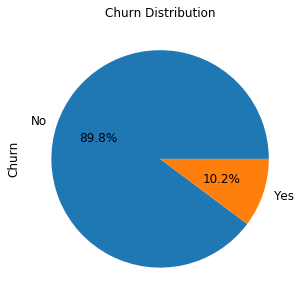

In [218]:
ax = (data_filtered['churn_flag'].value_counts()*100.0 /len(data_filtered)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

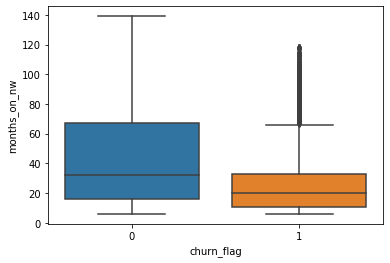

In [219]:

data_filtered['months_on_nw'] = round(data_filtered['aon']/(31))
data_filtered['months_on_nw']

sns.boxplot(x = data_filtered.churn_flag, y = data_filtered.months_on_nw)
# its clear tenured customers do not churn a lot

In [220]:
data_filtered.drop('aon', axis=1, inplace=True)

In [221]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = data_filtered.columns
data_null_perc = data_filtered.isnull().sum() * 100 / len(data_filtered)
data_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': data_null_perc})

drop_cols = data_null_df.loc[(data_null_df["col_name"].str.contains('_9')==False) & (data_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
data_filtered.drop(drop_cols, axis=1,inplace = True)
data_filtered.shape

list of columns dropped: Series([], Name: col_name, dtype: object)


(26682, 224)

In [222]:
#Now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
#Pls note the dataset is comprising only of numeric features now
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26682 entries, 0 to 30018
Data columns (total 169 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
l

In [223]:
#Plotting heatmap to get an overall picture
#heatmap(50,30,data_filtered)

In [224]:
## Heatmap is not of much help with large no of features
#Analysing further ..
correlation = data_filtered.corr()
correlation

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_6,amt_data_6,amt_data_7,amt_data_8,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag,months_on_nw
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,NaN,1.000000,0.485554,0.381883,0.386553,0.177315,0.134430,...,0.184192,0.927319,0.448181,0.372477,0.825563,-0.164400,0.019534,0.011543,0.063475,0.007479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
days_since_recharge_6,NaN,NaN,NaN,NaN,-0.164400,-0.102363,-0.034908,-0.155219,-0.133318,-0.095057,...,0.088574,-0.193520,-0.022455,-0.056547,-0.129382,1.000000,0.229560,0.103568,-0.010861,0.138936
days_since_recharge_7,NaN,NaN,NaN,NaN,0.019534,-0.200261,-0.200625,-0.046521,-0.145110,-0.168430,...,0.083234,0.039715,-0.228826,-0.164498,-0.114357,0.229560,1.000000,0.121260,0.135460,0.063927
days_since_recharge_8,NaN,NaN,NaN,NaN,0.011543,-0.072667,-0.120811,-0.009616,-0.036031,-0.061024,...,-0.013465,0.020161,-0.038437,-0.162416,-0.011135,0.103568,0.121260,1.000000,0.127538,0.011113
churn_flag,NaN,NaN,NaN,NaN,0.063475,-0.052614,-0.275675,0.077044,0.007373,-0.118284,...,-0.030923,0.067160,-0.062310,-0.275668,0.002585,-0.010861,0.135460,0.127538,1.000000,-0.142943


In [225]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
std_og_mou_6             0.138610
days_since_recharge_7    0.135460
days_since_recharge_8    0.127538
std_og_t2m_mou_6         0.105027
std_og_t2t_mou_6         0.098548
Name: churn_flag, dtype: float64 



In [226]:
# Analysis further

In [227]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data_filtered
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.show()

In [228]:
recharge_amnt_columns =  data_filtered.columns[data_filtered.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

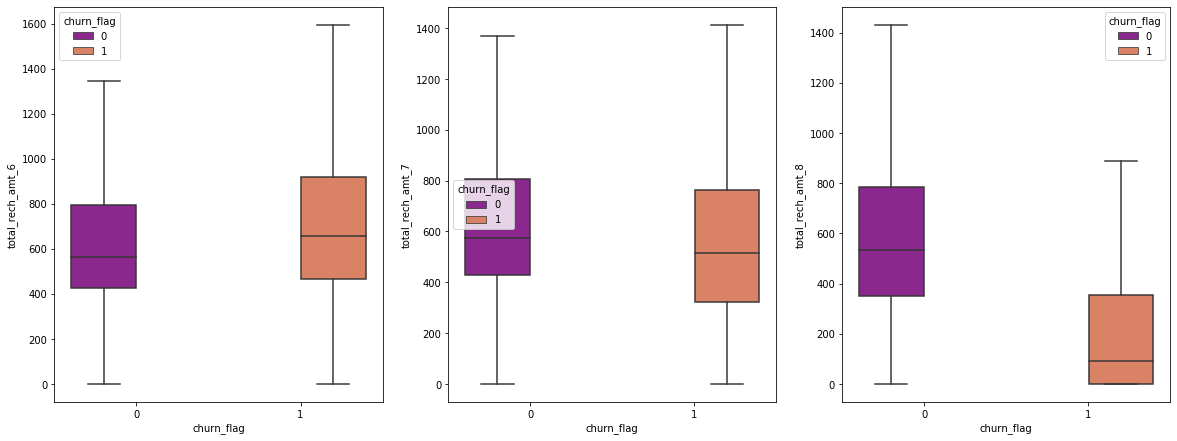

In [229]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')
#can see a drop in rechargeable amount down in 8th month for churning customers

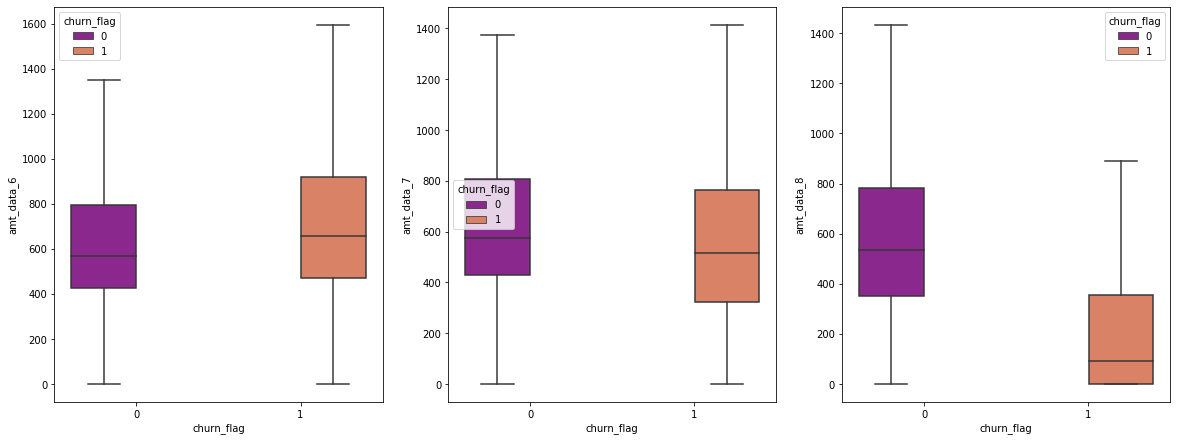

In [230]:
# Ploting for total recharge amount for data:
plot_box_chart('amt_data')
#recharge amount drops in 8th month for churning customers

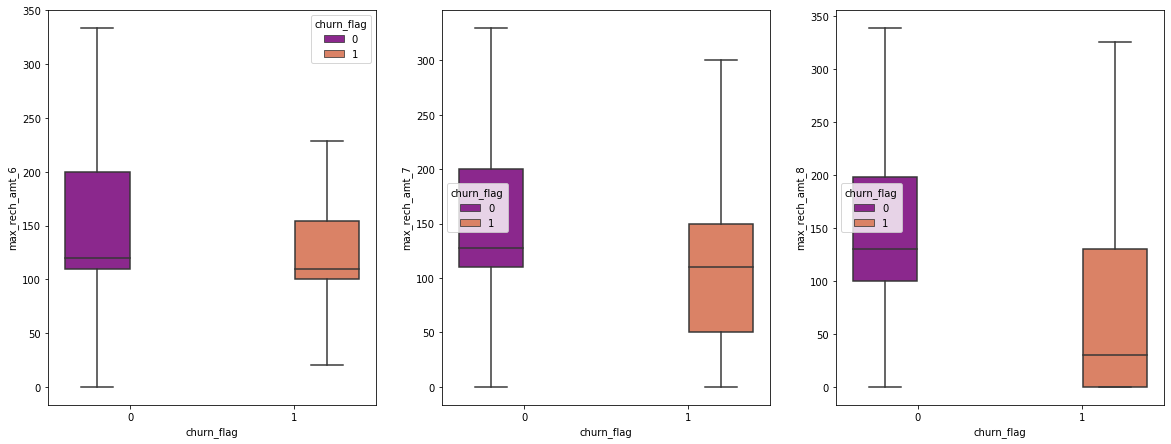

In [231]:
# Ploting for total recharge amount for data:
plot_box_chart('max_rech_amt')
#Max recharge amount drops in 8th month for churning customers

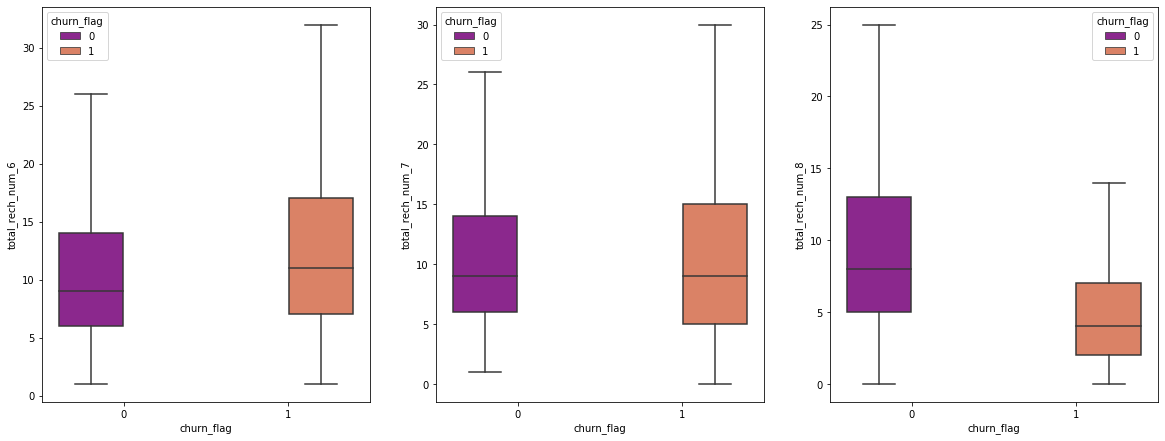

In [232]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')
#total recharge number drops in 8th month for churning customers

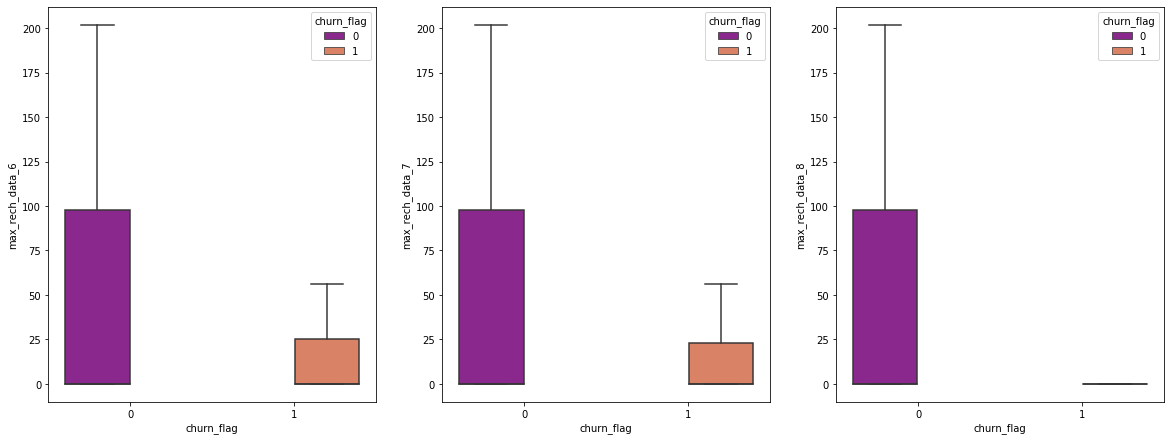

In [233]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')
#recharge data is almost going to nill in 8th month for churning customers

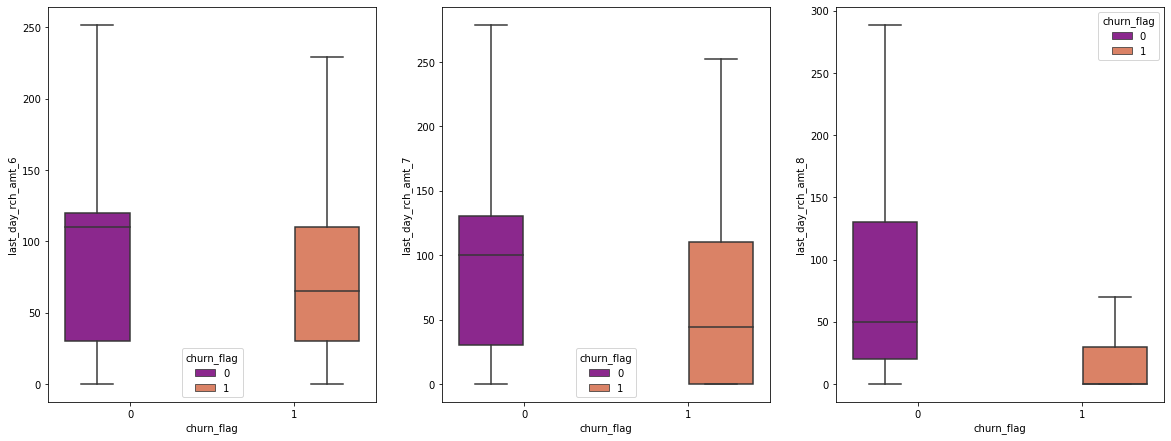

In [234]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')
#recharge amount is reducing a lot in 8th month for churning customers

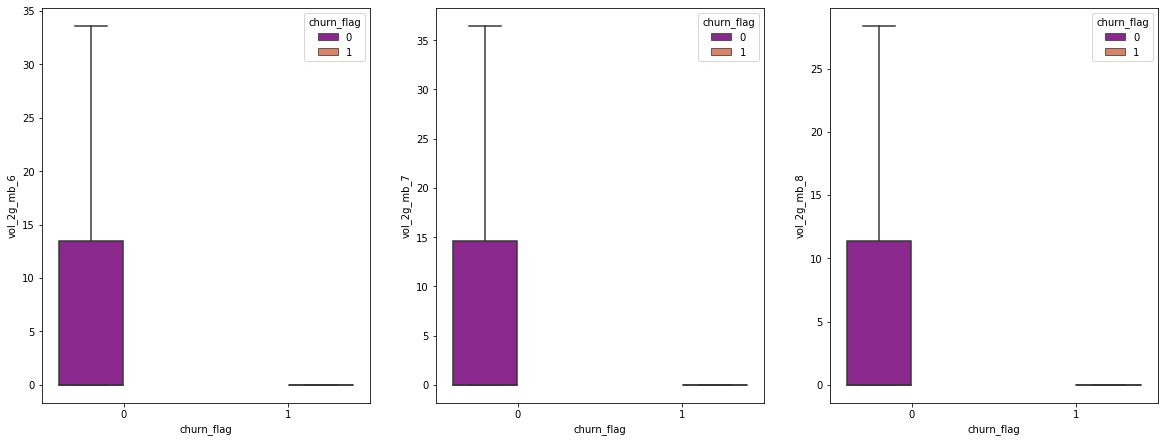

In [235]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')
#2g use of CHurn customers are very less in all 3 months

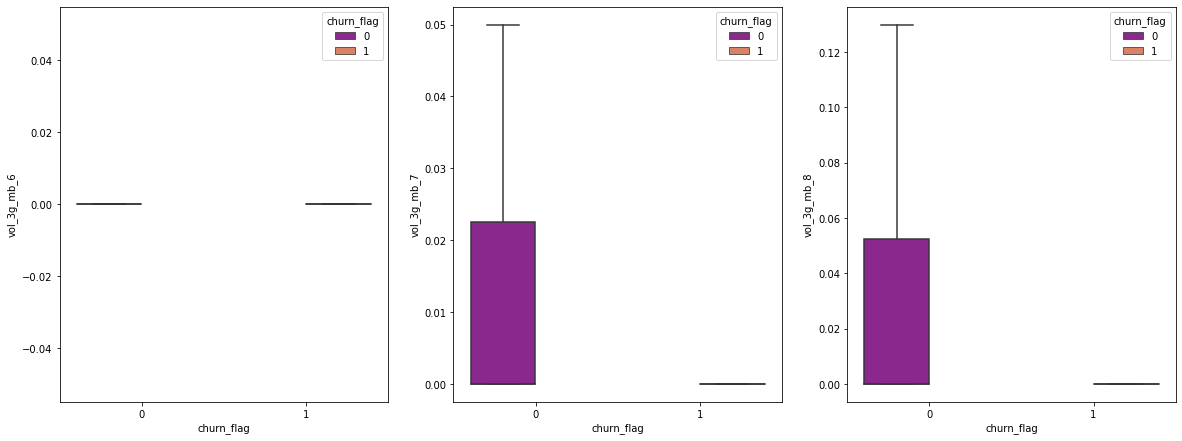

In [236]:
plot_box_chart('vol_3g_mb')
#3g use of CHurn customers are very less in all 3 months

In [237]:
mou_og_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_og_.*mou_6',regex=True)]

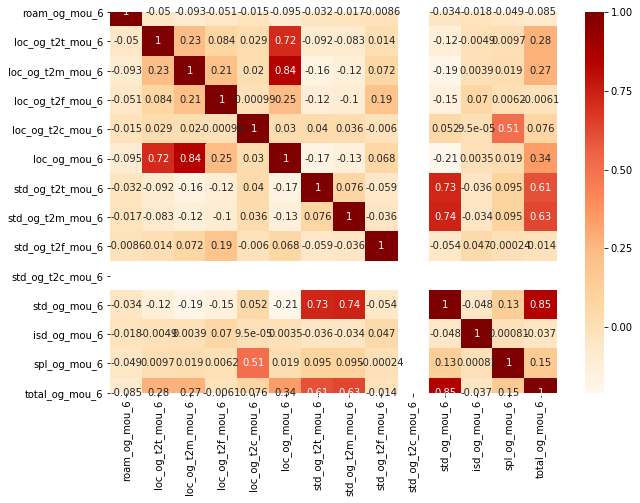

In [238]:
heatmap(10, 7,data_filtered.filter(mou_og_cols6))

In [239]:
print(data_filtered.loc[8,'total_og_mou_6'],"==",data_filtered.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(data_filtered.loc[8,'std_og_mou_6'],"==",data_filtered.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print(data_filtered.loc[8,'loc_og_mou_6'],"==",data_filtered.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

337.86 == 337.84999999999997
274.21 == 274.20000000000005
63.64 == 63.64


In [240]:
list_total_og_cols = data_filtered.columns[data_filtered.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
data_filtered.drop(list_total_og_cols,axis=1,inplace=True)
print("Columns dropped - ")
print(list_total_og_cols.tolist())

Columns dropped - 
['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [241]:
mou_ic_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_ic_.*mou_6',regex=True)]

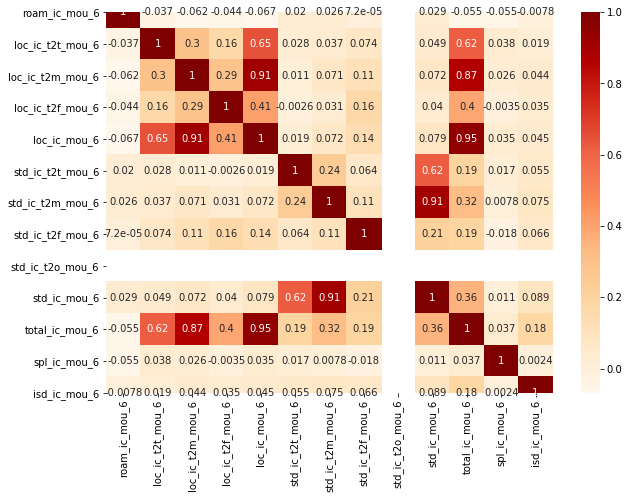

In [242]:
heatmap(10,7,data_filtered.filter(mou_ic_cols6))

In [243]:
print(data_filtered.loc[21,'total_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(data_filtered.loc[21,'loc_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print(data_filtered.loc[21,'std_ic_mou_6'],"==",data_filtered.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

392.69 == 392.68999999999994
350.78 == 350.76
41.91 == 41.9


In [244]:
list_total_ic_cols = data_filtered.columns[data_filtered.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
data_filtered.drop(list_total_ic_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_ic_cols.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [245]:
data_filtered.drop('avg_amt_data_6_7',axis=1,inplace=True)

In [246]:
col_list = data_filtered.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_filtered[avg_col_name] = (data_filtered[col_6]  + data_filtered[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_t2c_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_t2o_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
amt_data
days_since_recharge


In [247]:
col_list_to_drop = data_filtered.filter(regex='_6|_7')
data_filtered.drop(col_list_to_drop,axis=1,inplace=True)
print (data_filtered.shape)

(26682, 102)


In [248]:
# lets check the columns with no variance in their values and drop such columns
for i in data_filtered.columns:
    if data_filtered[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", data_filtered[i].nunique(),"unique value")
        print("Dropping the column",i)
        data_filtered.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",data_filtered.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_8 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_8

Column og_others_8 has no variance and contains only 1 unique value
Dropping the column og_others_8

Column std_ic_t2o_mou_8 has no variance and contains only 1 unique value
Dropping the column std_ic_t2o_mou_8

Column avg_std_og_t2c_mou_av67 has no variance and contains only 1 unique value
Dropping the column avg_std_og_t2c_mou_av67

Column avg_std_ic_t2o_mou_av67 has no variance and contains only 1 unique value
Dropping the column avg_std_ic_t2o_mou_av67

Dimensio

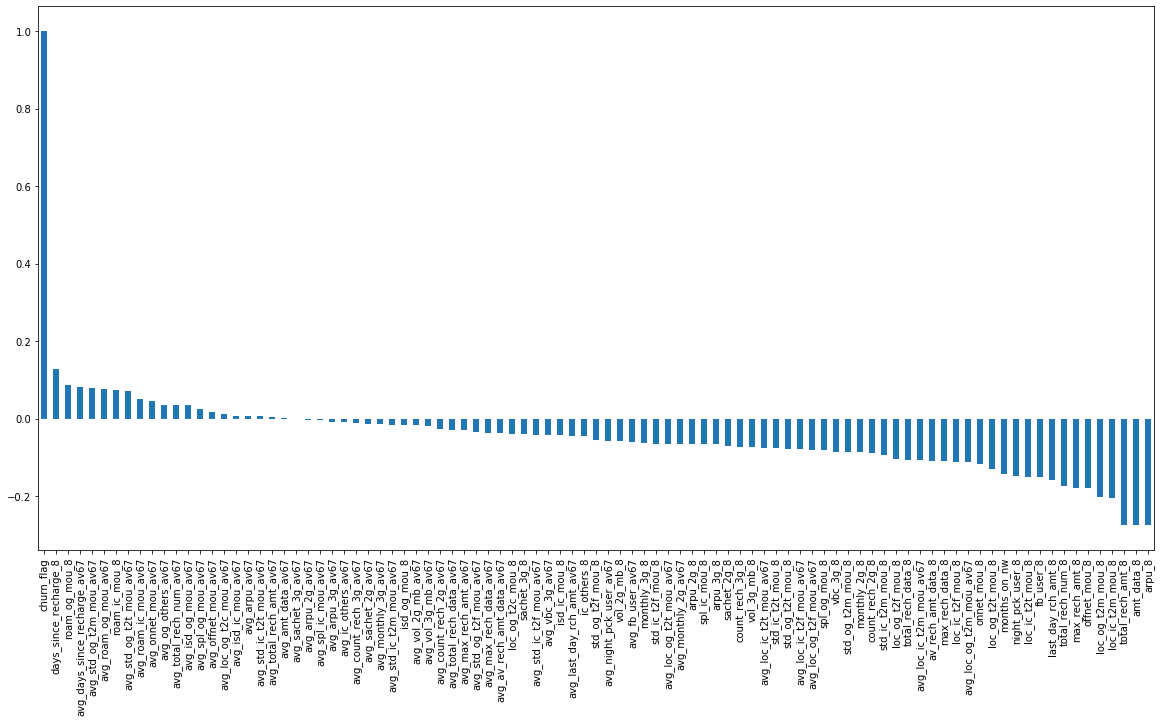

In [249]:
# lets check correlation of churn with other columns

plt.figure(figsize=(20,10))
data_filtered.corr()['churn_flag'].sort_values(ascending = False).plot(kind='bar')

#correlation with Churn
# positive - > days_since_recharge_8, average_days_since_recharge_67, averge_std_outgoing_67,
#       - average_roam_outgoing_67, roam_incomingcalls_8, 67 months - avg std, oam, outgoing, rechargeetc
# negative -> revenue_per_user_8, amnt_data_8, total_Recharge_amount_8, local_calls_inc/outg_8,
#         - total/rech_amount_8, months_on_network, other 8 month variables like - average_out_going, internet_usage, etc

In [250]:
# SPLITTING DATA SET

In [251]:
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print ("Shape of Train dataset",X_train.shape, y_train.shape)
print ("Shape of Test dataset",X_test.shape, y_test.shape)


Shape of Train dataset (18677, 92) (18677,)
Shape of Test dataset (8005, 92) (8005,)


In [252]:
# TREATING CLASS IMBALANCE

In [253]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm =  SMOTE(random_state = 27)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 1870
Before OverSampling, counts of label '0': 16807 

After OverSampling, the shape of train_X: (33614, 92)
After OverSampling, the shape of train_y: (33614,) 

After OverSampling, counts of label '1': 16807
After OverSampling, counts of label '0': 16807


In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

X_train_after_scaling = scaler.transform(X_train)
X_test_after_scaling = scaler.transform(X_test)

In [255]:
logreg = LogisticRegression()

logreg.fit(X_train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')

In [256]:
y_pred = logreg.predict(X_test_after_scaling)

In [257]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [258]:
y_pred.size

8005

In [259]:
y_test

7533     0
26374    0
5745     1
6307     0
29940    1
        ..
12069    0
29304    0
12125    0
23030    0
5738     1
Name: churn_flag, Length: 8005, dtype: int32

In [260]:
printingMSEandRsquare(y_test, y_pred)

0.15028107432854465
-0.5736491150321004


In [261]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[6135 1014]
 [ 189  667]]


In [262]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)


Acuracy Score 0.8497189256714553
Sensitivity:  0.7792056074766355
Specificity:  0.8581619806966009
false postive rate:  0.14183801930339907
positive predictive value:  0.3967876264128495
Negative predictive value:  0.9701138519924098
Misclassification Rate:  0.15028107432854465


In [263]:
x = X_train_after_scaling

In [264]:
from sklearn.decomposition import PCA

In [265]:
pca = PCA(random_state=42)

In [266]:
pca.fit(x)

PCA(random_state=42)

In [267]:
pca.components_

array([[ 1.12475323e-01, -6.78851822e-03,  2.39047380e-02, ...,
         1.49557993e-01,  6.15598208e-02,  3.25676536e-02],
       [ 2.78020873e-01,  1.88048146e-01,  2.48850134e-01, ...,
        -5.08342864e-02,  2.11060946e-01, -1.18116708e-01],
       [-6.10266979e-03,  2.39173705e-02,  1.71554051e-02, ...,
        -5.11900736e-02, -6.34051333e-02, -1.30973648e-01],
       ...,
       [-0.00000000e+00,  9.38967399e-15,  1.12952878e-14, ...,
        -2.01329860e-16, -6.05941940e-02,  4.72304108e-17],
       [-0.00000000e+00, -2.42631743e-15, -3.72813979e-15, ...,
         2.20399293e-17,  5.15420207e-01, -2.44269894e-17],
       [ 0.00000000e+00, -4.79590639e-15, -3.92870581e-15, ...,
         6.45006649e-17,  4.13708405e-01,  1.67364173e-16]])

In [268]:
pca.explained_variance_ratio_

array([1.60304610e-01, 8.52097335e-02, 6.45313505e-02, 5.36761906e-02,
       3.65373159e-02, 3.40688920e-02, 3.33043392e-02, 2.68489318e-02,
       2.59507684e-02, 2.32252697e-02, 2.15313817e-02, 2.12146133e-02,
       2.04777248e-02, 1.89919190e-02, 1.74162115e-02, 1.59822613e-02,
       1.55689732e-02, 1.41434228e-02, 1.39592411e-02, 1.28155545e-02,
       1.22576225e-02, 1.20309244e-02, 1.14024120e-02, 1.08623126e-02,
       1.04820374e-02, 1.03534065e-02, 1.01109997e-02, 9.61819199e-03,
       9.47491625e-03, 9.25610540e-03, 9.02047691e-03, 8.74975023e-03,
       8.27167125e-03, 8.10768871e-03, 7.80526632e-03, 7.58204323e-03,
       7.45172662e-03, 6.89295519e-03, 6.53622315e-03, 6.37218757e-03,
       5.99588882e-03, 5.78675411e-03, 5.65996154e-03, 5.50760098e-03,
       5.42035844e-03, 4.63870902e-03, 4.45670571e-03, 4.27499956e-03,
       4.04410337e-03, 3.77643462e-03, 3.75172754e-03, 3.67241083e-03,
       3.41710188e-03, 3.37754589e-03, 3.11744227e-03, 3.03277184e-03,
      

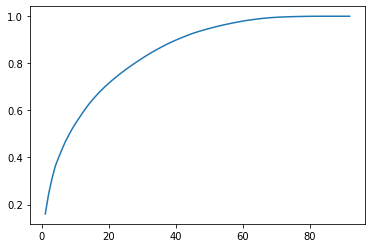

In [269]:
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [270]:
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=70)
train_pca = pcaFinal.fit_transform(X_train_after_scaling)
train_pca.shape

(33614, 70)

In [271]:
#Applying selected components to the test data - 70 components for 95 percent variance
test_pca = pcaFinal.fit_transform(X_test_after_scaling)
test_pca.shape 


(8005, 70)

In [272]:
train_pca

array([[-1.03272341e+00,  5.49892003e+00, -1.23305433e+00, ...,
        -6.52698676e-02, -1.73618374e-01, -2.16743914e-01],
       [-2.25142618e+00, -2.15715535e-01, -6.66645336e-01, ...,
        -1.00172654e-01,  1.12347461e-01, -3.27849774e-01],
       [-2.31259117e+00,  6.80888383e-01, -8.69094098e-01, ...,
        -3.53516636e-02, -1.65416570e-01,  2.19356030e-02],
       ...,
       [ 7.47606562e+00, -4.58306005e+00, -2.57398595e+00, ...,
         5.08897034e-01, -5.70529632e-01, -4.79834141e-01],
       [-2.97165226e+00, -2.36286432e+00, -8.77979842e-01, ...,
        -6.38498369e-03,  2.97989723e-02, -4.16582099e-02],
       [-1.30969543e+00, -9.17823902e-01,  1.09179222e+00, ...,
        -1.72598150e-01,  1.85612890e-01,  1.97429312e-01]])

In [273]:
y_train.shape

(33614,)

In [274]:
logreg = LogisticRegression()

logreg.fit(train_pca, y_train)

LogisticRegression()

In [275]:
y_pred = logreg.predict(test_pca)


In [276]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [277]:
y_pred.size

8005

In [278]:
y_test

7533     0
26374    0
5745     1
6307     0
29940    1
        ..
12069    0
29304    0
12125    0
23030    0
5738     1
Name: churn_flag, Length: 8005, dtype: int32

In [279]:
printingMSEandRsquare(y_test, y_pred)

0.4978138663335415
-4.21279445004399


In [280]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)
y_pred_default = y_pred

[[3358 3791]
 [ 194  662]]


In [281]:
printingConfusionMetricDetails(confusion_matrix2)

Acuracy Score 0.5021861336664585
Sensitivity:  0.7733644859813084
Specificity:  0.4697160442019863
false postive rate:  0.5302839557980137
positive predictive value:  0.14866382214237592
Negative predictive value:  0.9453828828828829
Misclassification Rate:  0.4978138663335415


In [282]:
# Decision tree after Logistic regression

In [283]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [284]:
# Let's check the evaluation metrics of our default model
# Making predictions
y_pred_default = dt_default.predict(test_pca)

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      7149
           1       0.17      0.67      0.27       856

    accuracy                           0.61      8005
   macro avg       0.55      0.64      0.50      8005
weighted avg       0.86      0.61      0.68      8005

[[4282 2867]
 [ 280  576]]
Acuracy Score 0.6068707058088695


In [285]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
printingConfusionMetricDetails(confusion_tree)

Acuracy Score 0.6068707058088695
Sensitivity:  0.6728971962616822
Specificity:  0.5989648901944328
false postive rate:  0.4010351098055672
positive predictive value:  0.16729596282311937
Negative predictive value:  0.9386234107847435
Misclassification Rate:  0.3931292941911305


In [286]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}


In [287]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [288]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)


In [289]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [290]:
y_train.shape

(33614,)

In [291]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.493716,0.017933,0.004997,0.000632,1,{'max_depth': 1},0.696564,0.694333,0.693589,0.695672,...,0.698132,0.006271,39,0.700271,0.701090,0.700011,0.700718,0.695895,0.699597,0.001888
1,0.932065,0.028604,0.004997,0.000002,2,{'max_depth': 2},0.717686,0.713818,0.713521,0.718578,...,0.718570,0.005707,38,0.721654,0.723030,0.719088,0.721766,0.715120,0.720132,0.002814
2,1.309249,0.029870,0.004797,0.000399,3,{'max_depth': 3},0.746393,0.732560,0.750409,0.754574,...,0.748587,0.009047,37,0.757428,0.739430,0.758878,0.755457,0.756508,0.753540,0.007144
3,1.694026,0.036190,0.004398,0.000489,4,{'max_depth': 4},0.760821,0.772721,0.763201,0.770638,...,0.768757,0.005858,36,0.776691,0.774943,0.773902,0.775687,0.774803,0.775205,0.000935
4,2.034631,0.019156,0.008995,0.007505,5,{'max_depth': 5},0.778224,0.796519,0.791313,0.801577,...,0.792676,0.007926,35,0.792719,0.797739,0.802164,0.804767,0.793842,0.798246,0.004649


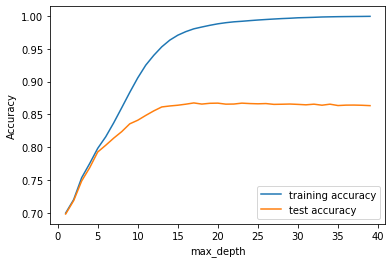

In [292]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [293]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True , n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [294]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.112470,0.168823,0.009795,3.866009e-03,5,{'min_samples_leaf': 5},0.840547,0.859140,0.850662,0.865685,...,0.854584,0.008505,1,0.960098,0.956454,0.957718,0.957495,0.958129,0.957979,0.001195
1,4.759805,0.126430,0.005997,6.675720e-07,25,{'min_samples_leaf': 25},0.819723,0.840994,0.835193,0.842779,...,0.834414,0.008133,2,0.887211,0.886579,0.883902,0.883902,0.884687,0.885256,0.001383
2,4.373120,0.111110,0.006597,4.892981e-04,45,{'min_samples_leaf': 45},0.811245,0.832069,0.824483,0.831177,...,0.826085,0.007916,3,0.860176,0.860176,0.859879,0.861924,0.860367,0.860505,0.000727
3,4.076137,0.059598,0.006196,4.009521e-04,65,{'min_samples_leaf': 65},0.806336,0.828945,0.820021,0.825822,...,0.820938,0.007860,4,0.846491,0.848760,0.843888,0.846826,0.844378,0.846069,0.001767
4,3.882171,0.032909,0.005998,5.761645e-07,85,{'min_samples_leaf': 85},0.805890,0.822847,0.811989,0.819277,...,0.815851,0.006105,5,0.837492,0.837529,0.835930,0.838756,0.835825,0.837107,0.001102


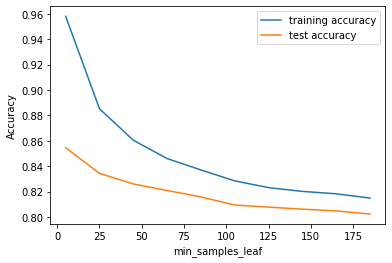

In [295]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 75

In [296]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [297]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.049154,0.190939,0.008595,0.002575,5,{'min_samples_split': 5},0.846646,0.868809,0.860925,0.865685,...,0.861427,0.007805,1,0.993343,0.993046,0.993641,0.993529,0.992563,0.993225,0.000387
1,6.975997,0.222843,0.006797,0.000399,25,{'min_samples_split': 25},0.830582,0.858248,0.845456,0.854678,...,0.848932,0.010143,2,0.954855,0.956156,0.950504,0.952214,0.953555,0.953457,0.001976
2,6.927425,0.207740,0.012193,0.011402,45,{'min_samples_split': 45},0.826714,0.852001,0.841440,0.847538,...,0.843696,0.009247,3,0.930200,0.928749,0.925217,0.929047,0.927041,0.928051,0.001741
3,7.057749,0.193680,0.006997,0.000632,65,{'min_samples_split': 65},0.818236,0.846051,0.837275,0.843968,...,0.837865,0.010248,4,0.913912,0.912090,0.903685,0.907925,0.909676,0.909457,0.003535
4,6.794018,0.218487,0.006397,0.000490,85,{'min_samples_split': 85},0.809906,0.839209,0.830433,0.834598,...,0.830428,0.010704,5,0.900747,0.895318,0.892269,0.899111,0.897962,0.897082,0.002987


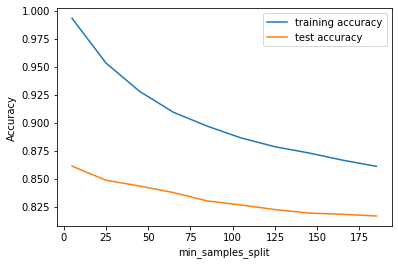

In [298]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [299]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 20, 5),
    'min_samples_leaf': range(5, 75, 20),
    'min_samples_split': range(5, 75, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  7.5min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 20, 5),
                         'min_samples_leaf': range(5, 75, 20),
                         'min_samples_split': range(5, 75, 20)},
             refit='recall_score', verbose=1)

In [300]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.120918,0.142539,0.006197,0.000400,entropy,10,5,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.827309,0.829094,0.837275,0.839209,0.829813,0.832540,0.004766,19
1,6.975390,0.156879,0.005797,0.000400,entropy,10,5,25,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.821360,0.826268,0.832515,0.836383,0.826837,0.828673,0.005231,22
2,6.988167,0.158619,0.006198,0.000401,entropy,10,5,45,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.816451,0.824037,0.832367,0.834449,0.825350,0.826531,0.006418,27
3,6.979056,0.095473,0.006197,0.000399,entropy,10,5,65,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.815856,0.824483,0.830879,0.831325,0.823713,0.825251,0.005653,36
4,6.791550,0.101842,0.006197,0.000748,entropy,10,25,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.813476,0.820021,0.827755,0.828350,0.824457,0.822812,0.005528,37


In [301]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8587789132440813
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=5, min_samples_split=5)


In [302]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [303]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[4769, 2380],
       [ 425,  431]], dtype=int64)

In [304]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.6495940037476577
Sensitivity:  0.5035046728971962
Specificity:  0.6670863057770318
false postive rate:  0.33291369422296824
positive predictive value:  0.15332621842760583
Negative predictive value:  0.9181748170966499
Misclassification Rate:  0.3504059962523423


In [305]:
# Random forest

# Importing random forest classifier from sklearn library
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [306]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[6264,  885],
       [ 591,  265]], dtype=int64)

In [307]:
printingConfusionMetricDetails(confusion_rf)

Acuracy Score 0.8156152404747034
Sensitivity:  0.30957943925233644
Specificity:  0.8762064624422996
false postive rate:  0.12379353755770038
positive predictive value:  0.23043478260869565
Negative predictive value:  0.9137855579868709
Misclassification Rate:  0.18438475952529668


In [308]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [309]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.083950,0.039109,0.151083,0.023224,2,{'max_depth': 2},0.764093,0.774803,0.757995,0.777332,...,0.770929,0.008487,4,0.782641,0.778662,0.761519,0.775166,0.772795,0.774157,0.007140
1,23.272610,0.078231,0.160309,0.033415,7,{'max_depth': 7},0.833556,0.848728,0.848282,0.841291,...,0.845154,0.007053,3,0.866424,0.862705,0.861887,0.861218,0.864644,0.863375,0.001909
2,34.573013,0.250244,0.194888,0.015663,12,{'max_depth': 12},0.910457,0.919381,0.912837,0.908225,...,0.913608,0.004130,2,0.960247,0.960582,0.959726,0.960916,0.961810,0.960656,0.000698
3,36.799623,4.050927,0.192150,0.041406,17,{'max_depth': 17},0.937082,0.940503,0.940503,0.933214,...,0.937943,0.002699,1,0.986166,0.987951,0.986538,0.987989,0.986539,0.987037,0.000774


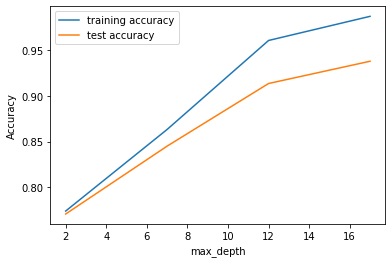

In [310]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 11 to 13

In [311]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, verbose = 1, return_train_score=True)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 19.3min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [312]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.793941,0.300635,0.186294,0.029476,100,{'n_estimators': 100},0.884724,0.894541,0.895136,0.883980,...,0.890046,0.004785,3,0.929010,0.928154,0.930943,0.927894,0.928306,0.928861,0.001105
1,152.523502,0.311181,0.876898,0.064611,500,{'n_estimators': 500},0.884278,0.894690,0.891120,0.887996,...,0.889957,0.003546,4,0.931464,0.930758,0.929010,0.930720,0.930425,0.930475,0.000808
2,275.411905,0.604813,1.516131,0.030320,900,{'n_estimators': 900},0.886063,0.895582,0.891864,0.886658,...,0.890790,0.003808,1,0.932282,0.931018,0.930348,0.930200,0.931058,0.930981,0.000736
3,357.867718,47.957483,1.743236,0.392050,1300,{'n_estimators': 1300},0.885914,0.897219,0.891418,0.886658,...,0.890552,0.004071,2,0.931055,0.931538,0.930200,0.930869,0.930834,0.930899,0.000431


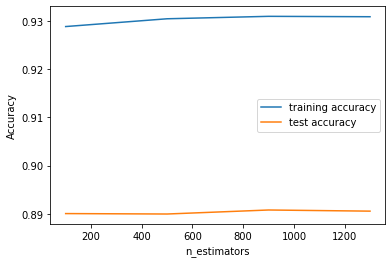

In [313]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [314]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.0min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [315]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.430243,0.103845,0.176299,0.007835,4,{'max_features': 4},0.875502,0.889930,0.888294,0.886955,...,0.886149,0.005445,5,0.923618,0.923878,0.922576,0.926258,0.924327,0.924131,0.001209
1,30.668058,0.160341,0.167104,0.006877,8,{'max_features': 8},0.877882,0.894987,0.891120,0.885468,...,0.887725,0.005802,4,0.927076,0.928229,0.927188,0.929233,0.929235,0.928192,0.000941
2,52.046807,0.179118,0.164906,0.007532,14,{'max_features': 14},0.884278,0.897665,0.891120,0.890525,...,0.892188,0.004963,3,0.933881,0.934513,0.931724,0.933026,0.934590,0.933547,0.001070
3,72.802390,0.361339,0.169303,0.012250,20,{'max_features': 20},0.890971,0.900193,0.893797,0.892607,...,0.895341,0.003658,2,0.937897,0.938121,0.936633,0.936968,0.938123,0.937548,0.000625
4,83.526869,2.900112,0.142279,0.042847,24,{'max_features': 24},0.892607,0.904358,0.895136,0.892607,...,0.897394,0.004962,1,0.938158,0.939868,0.938158,0.939422,0.940428,0.939207,0.000914


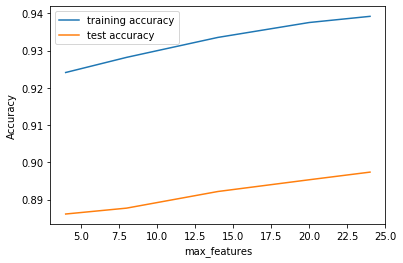

In [316]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 12

In [317]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [318]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,27.268677,0.279795,0.159960,0.017154,100,{'min_samples_leaf': 100},0.832515,0.851554,0.850216,0.847390,...,0.846612,0.007204,1,0.865792,0.862073,0.862259,0.863672,0.862822,0.863323,0.001354
1,25.402949,0.906952,0.159159,0.004664,150,{'min_samples_leaf': 150},0.823442,0.841886,0.839506,0.836383,...,0.836497,0.006802,2,0.852441,0.847235,0.847495,0.851995,0.849323,0.849698,0.002184
2,25.070625,0.204555,0.155961,0.020855,200,{'min_samples_leaf': 200},0.818533,0.838614,0.834895,0.830135,...,0.831915,0.007295,3,0.844781,0.841694,0.840393,0.841360,0.839952,0.841636,0.001694
3,23.879842,0.221924,0.155959,0.018926,250,{'min_samples_leaf': 250},0.809609,0.830135,0.829838,0.825376,...,0.825995,0.008743,4,0.838682,0.835930,0.835298,0.835744,0.834672,0.836065,0.001378
4,22.806900,0.248104,0.146363,0.015507,300,{'min_samples_leaf': 300},0.804700,0.823739,0.826863,0.823888,...,0.822128,0.009151,5,0.833141,0.828790,0.828456,0.832807,0.830396,0.830718,0.001958


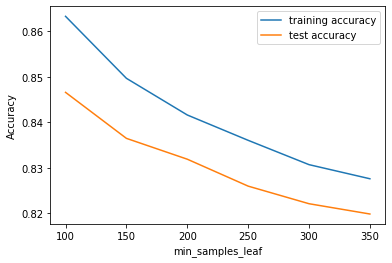

In [319]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [320]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [321]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,38.953305,0.315442,0.196750,0.005878,200,{'min_samples_split': 200},0.846497,0.870445,0.865536,0.864495,...,0.862676,0.008337,1,0.894091,0.887546,0.887583,0.889703,0.888220,0.889429,0.002459
1,37.973190,0.642144,0.190352,0.017992,250,{'min_samples_split': 250},0.836680,0.861669,0.858397,0.855422,...,0.854704,0.009292,2,0.882265,0.876910,0.877952,0.878249,0.880559,0.879187,0.001947
2,35.821748,0.632474,0.181554,0.016312,300,{'min_samples_split': 300},0.834151,0.858248,0.855422,0.850216,...,0.850539,0.008589,3,0.874940,0.868878,0.870440,0.872151,0.870036,0.871289,0.002106
3,34.726627,0.279460,0.171157,0.002993,350,{'min_samples_split': 350},0.830135,0.856760,0.849026,0.847092,...,0.847147,0.009126,4,0.869213,0.862519,0.864044,0.865866,0.864123,0.865153,0.002290
4,34.169625,0.423874,0.161560,0.005985,400,{'min_samples_split': 400},0.825673,0.853191,0.847241,0.842332,...,0.843845,0.009794,5,0.863374,0.859358,0.858168,0.861589,0.859810,0.860460,0.001825


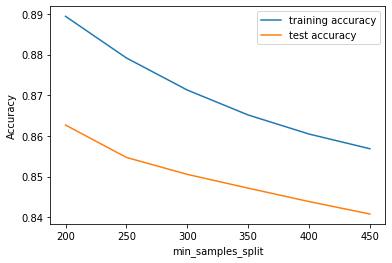

In [322]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [323]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [11,13],
    'min_samples_leaf': range(100, 150, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(300, 600, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs=-1, verbose = 1)

In [324]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 47.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [11, 13], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 150, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(300, 600, 100)},
             refit='recall_score', verbose=1)

In [325]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy got is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy got is 0.8459274707089959 using {'max_depth': 13, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [326]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=13,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=400)

In [327]:
rfc.fit(train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=10,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=400)

In [328]:
# predict
y_pred_default = rfc.predict(test_pca)

In [329]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[5017, 2132],
       [ 328,  528]], dtype=int64)

In [330]:
printingConfusionMetricDetails(confusion_rf_hyper)

Acuracy Score 0.6926920674578388
Sensitivity:  0.616822429906542
Specificity:  0.7017764722338788
false postive rate:  0.29822352776612115
positive predictive value:  0.19849624060150375
Negative predictive value:  0.9386342376052386
Misclassification Rate:  0.30730793254216116


In [331]:
# COMPARING MODELS

In [332]:
#first logistic reg - accu - 84, Se - 74 , Spec - 85
# PCA - Logisc - acc-50, Sen - 77, Sepc - 46
# DT - first - Acc - 60, Sen -67 , Spec - 59
# DT - tuning - Acc - 64, Sen - 50, Spec - 66
# RF - - first - Acc  81, Sen - 30, Sepc - 87
# RF - post tuning - Acc - 69 Sen - 61, Sepc -70
# 
# RF seems to have hte highest Accuracy post PCA

In [333]:
# let us use Logistic regression and  RF on full data set to get the important parameters

In [334]:
# 1. Logistic Regression- Important Features

In [335]:
logreg = LogisticRegression()

logreg.fit(X_train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')

In [336]:
y_pred = logreg.predict(X_test_after_scaling)

In [337]:
printingMSEandRsquare(y_test, y_pred)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)


0.15028107432854465
-0.5736491150321004
[[6135 1014]
 [ 189  667]]
Acuracy Score 0.8497189256714553
Sensitivity:  0.7792056074766355
Specificity:  0.8581619806966009
false postive rate:  0.14183801930339907
positive predictive value:  0.3967876264128495
Negative predictive value:  0.9701138519924098
Misclassification Rate:  0.15028107432854465


In [338]:
gridSearchForLR(lr,X_train_after_scaling,y_train)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.8626181958040944


In [339]:
logreg_afterTuning=LogisticRegression(C=1000,penalty="l2")
logreg_afterTuning.fit(X_train_after_scaling, y_train)

LogisticRegression(C=1000)

In [340]:
y_pred = logreg_afterTuning.predict(X_test_after_scaling)

In [341]:
printingMSEandRsquare(y_test, y_pred)

0.1476577139287945
-0.5461789309791709


In [342]:
confusion_matrix_LR = confusion_matrix(y_test, y_pred)
print(confusion_matrix_LR)

[[6160  989]
 [ 193  663]]


In [343]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_LR)

Acuracy Score 0.8523422860712055
Sensitivity:  0.7745327102803738
Specificity:  0.8616589732829767
false postive rate:  0.13834102671702336
positive predictive value:  0.4013317191283293
Negative predictive value:  0.9696206516606328
Misclassification Rate:  0.1476577139287945


In [344]:
#Printing importance table for Logistic Regression
importance = logreg_afterTuning.coef_[0]
impFeaturesforModels(importance)

[('total_rech_data_8',
  22.795497739721466),
 ('count_rech_2g_8',
  19.172239690358445),
 ('count_rech_3g_8',
  15.61335977691228),
 ('std_og_t2m_mou_8',
  1.0855273517738668),
 ('amt_data_8',
  0.9183763873283998),
 ('avg_std_og_t2t_mou_av67',
  0.8286968643092189),
 ('onnet_mou_8',
  0.5366286675994093),
 ('avg_total_rech_num_av67',
  0.4895284238348489),
 ('avg_arpu_2g_av67',
  0.42130940139963),
 ('avg_offnet_mou_av67',
  0.4211313125779051),
 ('avg_loc_ic_t2m_mou_av67',
  0.36001681004557284),
 ('avg_loc_og_t2t_mou_av67',
  0.34921449296447427),
 ('roam_og_mou_8',
  0.31222140334924353),
 ('avg_max_rech_data_av67',
  0.28655536120506647),
 ('arpu_2g_8',
  0.2784599020596347),
 ('loc_og_t2m_mou_8',
  0.16925456246483642),
 ('avg_max_rech_amt_av67',
  0.14006379123810422),
 ('avg_isd_og_mou_av67',
  0.1289407621294376),
 ('avg_days_since_recharge_av67',
  0.11902074767314977),
 ('max_rech_data_8',
  0.10798805308483454),
 ('avg_isd_ic_mou_av67',
  0.1044909390870871),
 ('avg_vol_3g

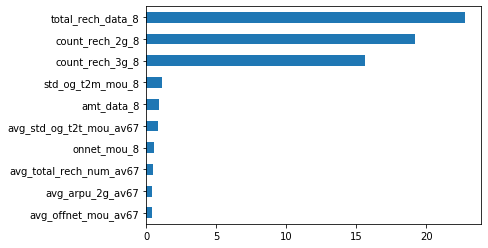

In [345]:
weights = pd.Series(importance,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [346]:
# Random Forest with Best Hyper Parameters - important Features

In [347]:
rfc_with_HyperParams = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [348]:
rfc_with_HyperParams.fit(X_train_after_scaling,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=12,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200)

In [349]:
# predict
y_pred_default = rfc_with_HyperParams.predict(X_test_after_scaling)

In [350]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6415,  734],
       [ 161,  695]], dtype=int64)

In [351]:
printingConfusionMetricDetails(confusion_rf_hyper)

Acuracy Score 0.8881948782011243
Sensitivity:  0.8119158878504673
Specificity:  0.8973282976640089
false postive rate:  0.10267170233599104
positive predictive value:  0.48635409377186845
Negative predictive value:  0.9755170316301703
Misclassification Rate:  0.11180512179887571


In [352]:
#Printing importance table for Random Forest
importance = rfc_with_HyperParams.feature_importances_
impFeaturesforModels(importance)
# let us use RF on full data set to get the important parameters

[('loc_ic_t2m_mou_8',
  0.09054413806718951),
 ('roam_ic_mou_8',
  0.08909418733980555),
 ('total_rech_amt_8',
  0.08857687473347069),
 ('roam_og_mou_8',
  0.08285881069243871),
 ('loc_og_t2m_mou_8',
  0.08058304378103708),
 ('amt_data_8',
  0.07785466424714899),
 ('arpu_8',
  0.057648896722412156),
 ('last_day_rch_amt_8',
  0.050424551752782536),
 ('offnet_mou_8',
  0.03678421687243153),
 ('loc_og_t2t_mou_8',
  0.033943130419831324),
 ('days_since_recharge_8',
  0.03344259593654181),
 ('max_rech_amt_8',
  0.033156619749922886),
 ('loc_ic_t2t_mou_8',
  0.030447723792266398),
 ('onnet_mou_8',
  0.020155763615860793),
 ('night_pck_user_8',
  0.017625414535677446),
 ('total_rech_num_8',
  0.014805500356219161),
 ('fb_user_8',
  0.011770358638829352),
 ('loc_ic_t2f_mou_8',
  0.00869910318870907),
 ('total_rech_data_8',
  0.00820177550030849),
 ('loc_og_t2f_mou_8',
  0.00811120287702212),
 ('avg_loc_og_t2c_mou_av67',
  0.007341571481916788),
 ('std_ic_t2m_mou_8',
  0.006959607245958658),
 (

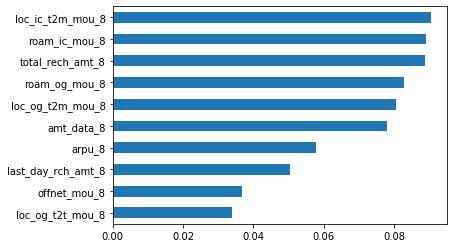

In [353]:
weights = pd.Series(importance,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [354]:
#top parameters of LR
# 1) total_rech_data_8 2)count_rech_2g_8 3) count_rech_3g_8 4)std_og_t2m_mou_8 5)avg_std_og_t2t_mou_av67
# 6)amt_data_8 7)onnet_mou_8 8)avg_offnet_mou_av67 9) avg_arpu_2g_av67 10) avg_total_rech_num_av67

#top parameters for RF
#1)total_rech_amt_8 2) roam_og_mou_8 3) amt_data_8 4)loc_ic_t2m_mou_8 5)roam_ic_mou_8
#6)loc_og_t2m_mou_8 7)arpu_8 8)offnet_mou_8 9) last_day_rch_amt_8 10)loc_ic_t2t_mou_8

In [355]:
# observations
# 1) Total rechargeable amount (and total rech data included there) for month 8 seems to be a strong indicator
# 2) Number of times customer recharges for 2g and 3g data are also strong indicators of Churn
# 3) Average revenue per user - dipping is a strong indicator of Churn
